# 개요

* 아래의 목적/이유로 참가한 스터디에 대한 기록
  * SQLD취득 후 장기 미사용 & GPT를 통한 SQL사용 등으로 많이 잊은 SQL을 복기
  * 기존에 사용해 본 Optuna가 아닌 Autogluon이 커리큘럼에 있어 익혀보고자 함
  * 혼자서 postgresql로 DB만들어 써본 적은 있는데, 잘 와닿지 않는 '데이터마트'생성이 언급되어 있어 개념 정립하고자 함
  * 기존에 관심있던 XAI(설명가능한 AI)를 익히고자 함

* 1주차 요약
  * SQL문의 실행순서와 실습
  * 프로그래머스, 해커스랭크의 SQL문제풀이 과제
    * 해커스랭크는 문제/풀이 게시에 대한 저작권 내용 확인이 어려워 삭제함
  * 참고 : 하단 실습코드는 head() 적용되 있음(불필요하게 긴 포스팅 방지)

# 1주차 수업정리

## SQL문 실행순서

1. SELECT  
2. FROM  
3. JOIN ON  
4. WHERE  
5. GROUP BY   
6. HAVING
7. ORDER BY  
8. LIMIT

## SELECT

In [ ]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('my_database.db')

In [ ]:
# 컬럼 지정
selected_df = pd.read_sql_query("SELECT idx, y, job FROM my_table;", conn)
selected_df.head(5)

,idx,y,job
0,0,no,housemaid
1,1,no,services
2,2,no,services
3,3,no,admin.
4,4,no,services


In [ ]:
# 전체 컬럼 (*)
df_all = pd.read_sql_query("SELECT * FROM my_table", conn)
df_all.head(5)

,idx,age,job,marital,education,is_default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## SELECT 실습

* my_table에서 idx, martial, education, y를 조회하여 df_trial_1에 할당해봅시다.

In [ ]:
df_trial_1 = pd.read_sql_query("SELECT idx, marital, education, y FROM my_table", conn)
df_trial_1.head(5)

,idx,marital,education,y
0,0,married,basic.4y,no
1,1,married,high.school,no
2,2,married,high.school,no
3,3,married,basic.6y,no
4,4,married,high.school,no


## WHERE
* WHERE에서의 `1=1`의 사용
  * 없어도 되지만 **편의**를 위해 사용. **실무적으로 많이 활용되는 편**
  * 괄호를 활용해 우선순위를 부여(명시)해주는 것이 좋음
    * AND(*)가 OR(+)보다 우선순위가 높으나, 헷갈리지 않게 명시

In [ ]:
q = """SELECT
    *
FROM my_table
WHERE 1=1
    AND y = 'no'
    AND (
        is_default = 'no'
        OR campaign > 0
    );"""
df_multicon_2 = pd.read_sql_query(q, conn)
df_multicon_2.head(5)

,idx,age,job,marital,education,is_default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## WHERE 심화

* LIKE : 문자열에서 찾기 (%와 함께 사용해 특정 문자열을 포함한 경우를 찾기도 함)
* IN : 특정 목록에 포함된 경우 찾기
* BETWEEN : 범위 안에 포함된 경우 찾기

In [ ]:
# 'LIKE'를 활용해 9가 포함된 값을 찾는 예제
q = """SELECT
    *
FROM my_table
WHERE idx LIKE '%9%';"""

df_idcode_9 = pd.read_sql_query(q, conn)
df_idcode_9.head(5)

,idx,age,job,marital,education,is_default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,9,25,services,single,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,19,39,management,single,basic.9y,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,29,55,unknown,married,university.degree,unknown,unknown,unknown,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,39,56,technician,married,basic.4y,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,49,45,blue-collar,married,basic.9y,no,yes,no,telephone,may,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# 'IN'을 활용해 특정 목록의 데이터가 포함된 값을 찾는 예제
IDS = ('11003','12903')

q = f"""SELECT
    *
FROM my_table
WHERE idx in {IDS};"""

df_given_ids = pd.read_sql_query(q, conn)
df_given_ids

,idx,age,job,marital,education,is_default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,11003,56,retired,married,basic.4y,no,yes,no,telephone,jun,...,30,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
1,12903,23,admin.,single,high.school,no,no,no,cellular,jul,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no


In [ ]:
# 'BETWEEN'을 활용해 특정 범위의 데이터를 찾는 예제
q ="""SELECT
    *
FROM my_table
WHERE campaign BETWEEN 10 AND 20;"""

df_between = pd.read_sql_query(q, conn)
df_between.head(5)

,idx,age,job,marital,education,is_default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,2183,58,management,married,university.degree,no,no,no,telephone,may,...,10,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,2189,56,admin.,married,basic.9y,unknown,no,no,telephone,may,...,11,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2234,47,management,married,university.degree,no,no,no,telephone,may,...,12,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,2553,54,retired,married,high.school,unknown,no,no,telephone,may,...,10,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
4,2554,31,admin.,married,high.school,unknown,yes,no,telephone,may,...,13,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no


## WHERE 실습

* 문제
  * idx에 7이 들어가며
  * emp_var_rate가 1보다 크고
  * 연령이 20세 이하거나
  * 연령이 70대 이상인
  * 고객을 구하세요.

In [ ]:
q ="""SELECT
    *
FROM my_table
WHERE 1=1
AND idx Like '%7%'
AND emp_var_rate > 1
AND (age <= 20 or age >= 70);"""

df_q2 = pd.read_sql_query(q, conn)
df_q2

,idx,age,job,marital,education,is_default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,6575,20,entrepreneur,single,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,13407,20,admin.,single,high.school,no,no,no,cellular,jul,...,4,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
2,15798,19,student,single,basic.9y,unknown,yes,no,cellular,jul,...,4,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no


## GROUP BY (+집계함수)

* GROUP BY를 활용해 정보를 그룹핑하여 볼 수 있음
* SELECT문에 집계함수(SUM 등)를 적어, 해당 컬럼별 집계 가능
  * 주의 : 컬럼(변수)이 집계함수나 GROUP BY절 중 한 곳에는 있어야 함
  * 추천 : 집계함수를 적용한 컬럼은 AS로 이름을 지정하는 것이 좋음
* 집계함수의 종류
  * SUM : 합
  * AVG (MEAN) : 평균
  * MIN / MAX : 최소 / 최대값
  * COUNT : 개수

In [ ]:
q ="""SELECT
    y, SUM(duration) as sum_dur
FROM my_table
GROUP BY y;"""

df_sum_0 = pd.read_sql_query(q, conn)
df_sum_0

,y,sum_dur
0,no,8071436
1,yes,2566807


## GROUP BY 실습

* 문제
  *  y별로
  *  idx에 7이 들어가는 대상에 대해
  *  duration의 합과
  *  campaign의 평균, 최대, 최소값을 구해봅시다

In [ ]:
q ="""SELECT
    y, SUM(duration) as sum_dur, AVG(campaign) as avg_camp, MIN(campaign) as min_camp, MAX(campaign) as max_camp
FROM my_table
WHERE idx like '%7%'
GROUP BY y;"""

df_sum_0 = pd.read_sql_query(q, conn)
df_sum_0

,y,sum_dur,avg_camp,min_camp,max_camp
0,no,2680014,2.786460,1,56
1,yes,911542,2.091711,1,17


## HAVING

* 집계함수의 결과의 필터링에 HAVING 사용
  * 집계함수는 WHERE절 이후 실행되어 WHERE절에서의 집계함수 필터링은 불가함

In [ ]:
q ="""SELECT
    y, SUM(duration) as sum_dur
FROM my_table
GROUP BY y
HAVING SUM(duration) > 5000000;"""

df_sum_over_1m = pd.read_sql_query(q, conn)
df_sum_over_1m

,y,sum_dur
0,no,8071436


## HAVING 실습

* 문제
  * y별로
  * var_0의 평균값이 11보다 큰 y 대해
  * var_0의 평균을 avg_var_0,
  * var_100의 최대값을 max_var_100,
  * var_100의 최소값을 min_var_100
  * 으로 구하는 쿼리를 써봅시다.

In [ ]:
q ="""SELECT
    y, SUM(duration) as sum_dur
FROM my_table
GROUP BY y
HAVING SUM(duration) > 5000000;"""

df_sum_over_1m = pd.read_sql_query(q, conn)
df_sum_over_1m

,y,sum_dur
0,no,8071436


## ORDER BY(정렬)

* ORDER BY로 정렬 (SQL마다 다를 수 있으나 기본값은 보통 오름차순)
  * 내림차순을 원하는 경우 뒤에 `DESC`를 붙임

In [ ]:
# 오름차순 (기본값) 예제
q ="""SELECT
    *
FROM my_table
ORDER BY idx;"""

df_var0_order = pd.read_sql_query(q, conn)
df_var0_order.head(5)

,idx,age,job,marital,education,is_default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# 내림차순 예제제
q ="""SELECT
    *
FROM my_table
ORDER BY idx;"""

df_var0_order = pd.read_sql_query(q, conn)
df_var0_order.head(5)

## LIMIT

* **위에서부터 N개의 값을 반환**하는, pandas의 .head(N)과 같은 함수

In [ ]:
q = """SELECT
    *
FROM my_table
LIMIT 100
"""

df_100 = pd.read_sql_query(q, conn)
len(df_100)

100

## ORDER BY & LIMIT 실습

* pdays가 999가 아닌 경우에 한해서, pdays값이 상위 100개에 해당하는 데이터를 반환하는 쿼리를 짜 봅시다.

In [ ]:
# Write your code
q = """SELECT
    *
FROM my_table
WHERE pdays != 999
ORDER BY pdays desc
LIMIT 100
"""

df_100 = pd.read_sql_query(q, conn)

print(len(df_100))
df_100.head(5)

100


,idx,age,job,marital,education,is_default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,40874,41,technician,married,professional.course,no,no,no,cellular,oct,...,2,27,1,success,-1.1,94.601,-49.5,0.959,4963.6,yes
1,40243,24,technician,married,professional.course,no,no,no,cellular,jul,...,4,26,1,success,-1.7,94.215,-40.3,0.885,4991.6,yes
2,40234,60,admin.,married,basic.9y,no,no,no,cellular,jul,...,2,25,2,failure,-1.7,94.215,-40.3,0.884,4991.6,yes
3,39883,28,management,single,university.degree,no,yes,no,cellular,jun,...,1,22,1,success,-1.7,94.055,-39.8,0.729,4991.6,yes
4,40489,30,admin.,single,high.school,no,no,no,telephone,aug,...,1,22,1,success,-1.7,94.027,-38.3,0.899,4991.6,no


## 결과를 테이블로 저장

*` CREATE TABLE (테이블이름) AS` SELECT * FROM TABLE

In [ ]:
# 특정 쿼리를 테이블 저장

q ="""CREATE TABLE MY_TABLE_ORDERED AS
SELECT
    *
FROM MY_TABLE
ORDER BY idx DESC;"""
conn.execute(q)

# 저정한 테이블 조회
q2 ="""SELECT * FROM MY_TABLE_ORDERED;"""

df_var0_desc_order = pd.read_sql_query(q2, conn)
df_var0_desc_order.head(5)

,idx,age,job,marital,education,is_default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,41187,74,retired,married,professional.course,no,yes,no,cellular,nov,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no
1,41186,44,technician,married,professional.course,no,no,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
2,41185,56,retired,married,university.degree,no,yes,no,cellular,nov,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
3,41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
4,41183,73,retired,married,professional.course,no,yes,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
# 저장한 테이블 삭제
q ="""DROP TABLE MY_TABLE_ORDERED;"""

conn.execute(q)

## 결과를 테이블로 저장하기 실습

In [ ]:
# 테이블 저장
q ="""CREATE TABLE question6 AS
SELECT
    *
FROM my_table
WHERE pdays != 999
ORDER BY pdays desc
LIMIT 100;"""
conn.execute(q)

# 저장한 테이블 확인
q2 = """SELECT * FROM question6"""
result1 = pd.read_sql_query(q2, conn)
result1

,idx,age,job,marital,education,is_default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,40874,41,technician,married,professional.course,no,no,no,cellular,oct,...,2,27,1,success,-1.1,94.601,-49.5,0.959,4963.6,yes
1,40243,24,technician,married,professional.course,no,no,no,cellular,jul,...,4,26,1,success,-1.7,94.215,-40.3,0.885,4991.6,yes
2,40234,60,admin.,married,basic.9y,no,no,no,cellular,jul,...,2,25,2,failure,-1.7,94.215,-40.3,0.884,4991.6,yes
3,39883,28,management,single,university.degree,no,yes,no,cellular,jun,...,1,22,1,success,-1.7,94.055,-39.8,0.729,4991.6,yes
4,40489,30,admin.,single,high.school,no,no,no,telephone,aug,...,1,22,1,success,-1.7,94.027,-38.3,0.899,4991.6,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,39157,38,blue-collar,single,high.school,no,yes,no,cellular,mar,...,1,13,2,failure,-1.8,93.369,-34.8,0.655,5008.7,yes
96,39243,39,admin.,divorced,university.degree,no,yes,no,cellular,mar,...,1,13,1,success,-1.8,93.369,-34.8,0.650,5008.7,no
97,39315,29,technician,single,professional.course,no,yes,yes,cellular,mar,...,2,13,1,success,-1.8,93.369,-34.8,0.643,5008.7,yes
98,39556,38,admin.,single,high.school,no,yes,yes,cellular,apr,...,1,13,1,success,-1.8,93.749,-34.6,0.659,5008.7,yes


# 과제

## 프로그래머스 과제 풀기

* 저작권 관련 [프로그래머스 링크](https://docs.channel.io/grepp_qna/ko/articles/%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%A8%B8%EC%8A%A4%EC%9D%98-%EB%AC%B8%EC%A0%9C%EB%A5%BC-%EC%99%B8%EB%B6%80%EC%97%90-%EA%B2%8C%EC%8B%9C%ED%95%A0-%EC%88%98-%EC%9E%88%EB%82%98%EC%9A%94-3f8537c9)
```
  코딩 테스트 연습 문제
  코딩테스트 연습에 공개된 문제는 (주)그렙이 저작권을 가지고 있습니다.
  (지문 하단에 별도 저작권 표시 문제 제외)
  코딩테스트 연습 문제의 지문, 테스트케이스, 풀이 등과 같은 정보는 비상업적, 비영리적 용도로 게시할 수 있습니다.
  다만 문제의 지문, 풀이 등과 같은 정보를 단순히 게시하는 것을 넘어, 
  이를 바탕으로 문제를 풀고 채점이 가능하도록 하는 등의 방식으로 활용하는 것은 제한됩니다.

  ※ 2020 KAKAO BLIND RECRUITMENT, Summer/Winter Coding 등의 문제는 기업 코딩 테스트에 나온 문제이나, 
  코딩테스트 연습에 공개된 문제이기 때문에 마찬가지로 비상업적, 비영리적 용도로 게시할 수 있습니다.

  (2021. 01. 08 업데이트)
```

* https://school.programmers.co.kr/learn/courses/30/lessons/59040
  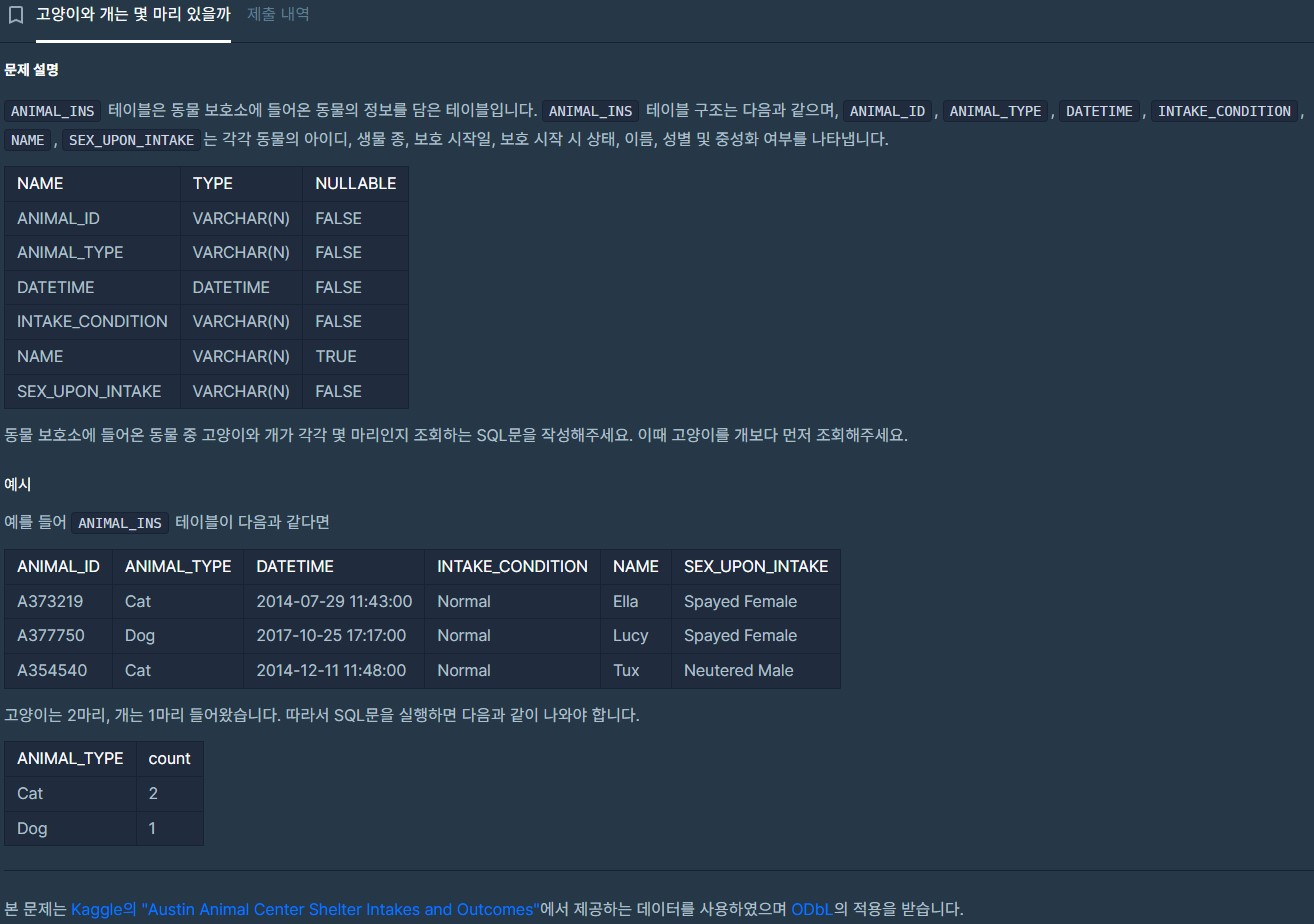
    ```{sql}
    SELECT ANIMAL_TYPE, COUNT(*)
    FROM ANIMAL_INS
    GROUP BY ANIMAL_TYPE
    ORDER BY ANIMAL_TYPE
    ```

* https://school.programmers.co.kr/learn/courses/30/lessons/133024<br>
  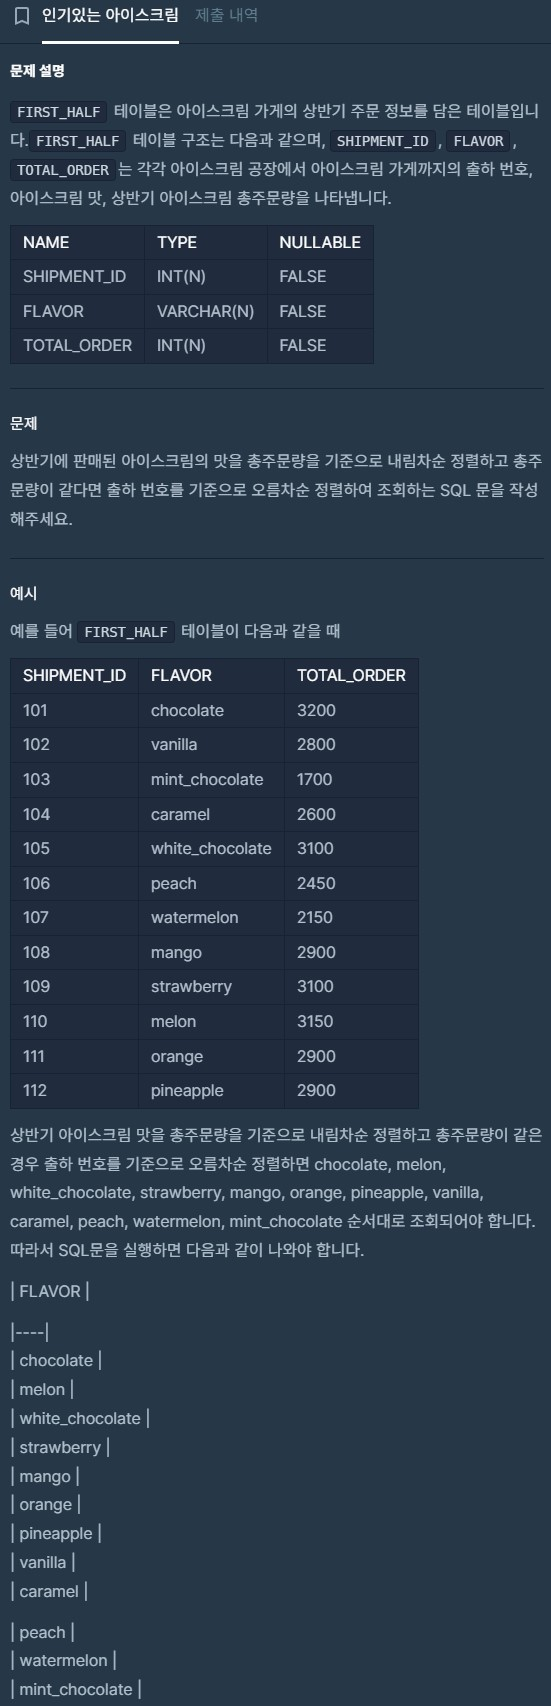
    ```{sql}
    SELECT FLAVOR
    FROM FIRST_HALF 
    ORDER BY TOTAL_ORDER DESC, SHIPMENT_ID
    ```

* https://school.programmers.co.kr/learn/courses/30/lessons/59405<br>
  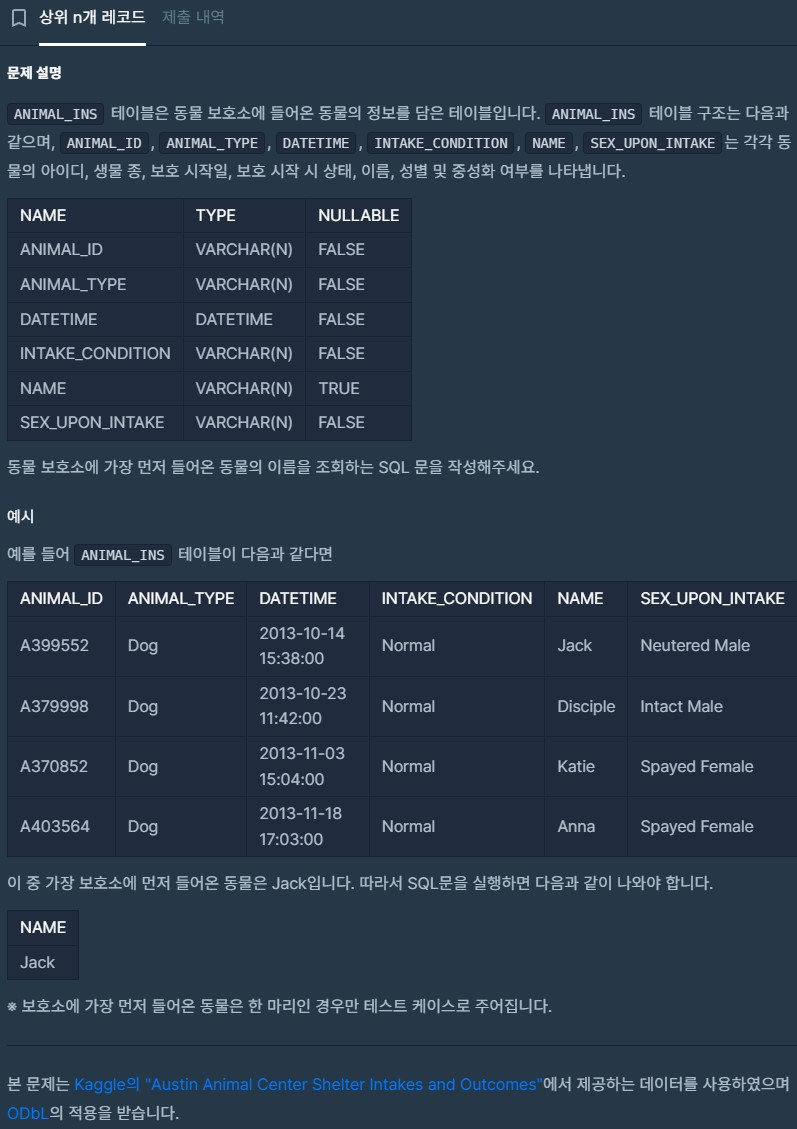
    ```{sql}
    SELECT NAME
    FROM ANIMAL_INS 
    ORDER BY DATETIME
    LIMIT 1
    ```

* https://school.programmers.co.kr/learn/courses/30/lessons/131697<br>
  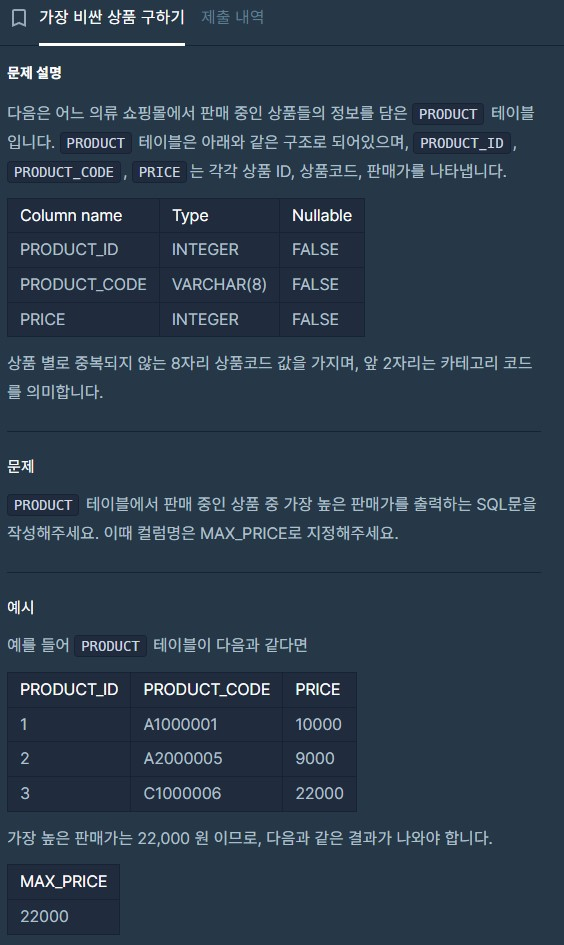
    ```{sql}
    SELECT MAX(PRICE) AS MAX_PRICE
    FROM PRODUCT
    ```